<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.3: Measurements

In [ ]:
## Import libraries

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 1.1 Load Diabetics Data Using datasets of sklearn

In [ ]:
# Load the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

In [ ]:
# Description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
print(X.columns)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [ ]:
# Target
y = diabetes.target
print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [ ]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 1.2 Use Forward Feature Selection to pick a good model

**Hint: Same as Lab 4.2.2**

- Add R^2 value in a list
- Add Adjusted R^2 in another list
- Display both R^2 and Adjusted R^2

In [ ]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

## Ricky's solution

In [ ]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = s6, s2, bp, s4, bmi, s3, s5, sex, age, s1
(Step) Trying s6...
(Step) - Features = s6
(Step) - Adjusted R^2: This = 0.150; Best = 0.000
(Step) - New Best!   : Feature = s6; R^2 = 0.152; Adjusted R^2 = 0.150
(Step) Trying s2...
(Step) - Features = s2
(Step) - Adjusted R^2: This = 0.021; Best = 0.150
(Step) Trying bp...
(Step) - Features = bp
(Step) - Adjusted R^2: This = 0.196; Best = 0.150
(Step) - New Best!   : Feature = bp; R^2 = 0.198; Adjusted R^2 = 0.196
(Step) Trying s4...
(Step) - Features = s4
(Step) - Adjusted R^2: This = 0.178; Best = 0.196
(Step) Trying bmi...
(Step) - Features = bmi
(Step) - Adjusted R^2: This = 0.364; Best = 0.196
(Step) - New Best!   : Feature = bmi; R^2 = 0.366; Adjusted R^2 = 0.364
(Step) Trying s3...
(Step) - Features = s3
(Step) - Adjusted R^2: This = 0.145; Best = 0.364
(Step) Trying s5...
(Step) - Features = s5
(Step) - Adjusted R^2: This = 0.303; Best = 0.364
(Step) Trying sex...
(Step) - Features = sex
(Step) - Adjusted R^2: This

## My own solution

In [212]:
test_feature = []
exclude = []
print('test_feature:', test_feature)
best_feature = []
all_feature = [X_train.columns[i] for i in range(len(X_train.columns))]
best = {'feature': '', 'r2': 0, 'a_r2': 0}
model = LinearRegression()
r2_list = []
adjusted_r2_list=[]

while len(all_feature) > len(exclude)+1 :
    test_feature = [x for x in all_feature if x not in exclude]
    i = len(test_feature) - 1
    while i > 0:
        include=[]
        for j in exclude:
            include.append(j)
        print('New feature added:', test_feature[i])
        include.append(test_feature[i])
        print('Features try:', include)

        # Fit the model and calculate scores
        fit = model.fit(X_train[include], y_train)
        r2 = model.score(X_train[include], y_train)
        a_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
        
        print('This r2 = ', r2)
        print('Adjusted_r2 =', a_r2)
        print('Best adjusted_r2 =', best['a_r2'])
        
        # If the adusted R square better than the best one, keep the feature.
        if a_r2 > best['a_r2']:
            best['feature'] = test_feature[i]
            best['r2'] = r2
            best['a_r2'] = a_r2
            print('New best adjusted r2:', best)
        i=i-1
        
    exclude.append(best['feature'])
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])
    print('Round and exclude', len(exclude), exclude)


test_feature: []
New feature added: s6
Features try: ['s6']
This r2 =  0.15238336813912534
Adjusted_r2 = 0.1326713534446864
Best adjusted_r2 = 0
New best adjusted r2: {'feature': 's6', 'r2': 0.15238336813912534, 'a_r2': 0.1326713534446864}
New feature added: s5
Features try: ['s5']
This r2 =  0.30490618270549497
Adjusted_r2 = 0.288741210210274
Best adjusted_r2 = 0.1326713534446864
New best adjusted r2: {'feature': 's5', 'r2': 0.30490618270549497, 'a_r2': 0.288741210210274}
New feature added: s4
Features try: ['s4']
This r2 =  0.18070500670607326
Adjusted_r2 = 0.16165163476900524
Best adjusted_r2 = 0.288741210210274
New feature added: s3
Features try: ['s3']
This r2 =  0.14745562562881254
Adjusted_r2 = 0.12762901227134305
Best adjusted_r2 = 0.288741210210274
New feature added: s2
Features try: ['s2']
This r2 =  0.024000767403965395
Adjusted_r2 = 0.00130311083196466
Best adjusted_r2 = 0.288741210210274
New feature added: s1
Features try: ['s1']
This r2 =  0.039819084977916974
Adjusted_r2

Note:
- My own solution seems to test every feature, instead of just only a few features that Ricky's solution does. If I rounded up the number, I can see why this might happen. However, I couldn't find any part in Ricky's script that showed the round up of the number.

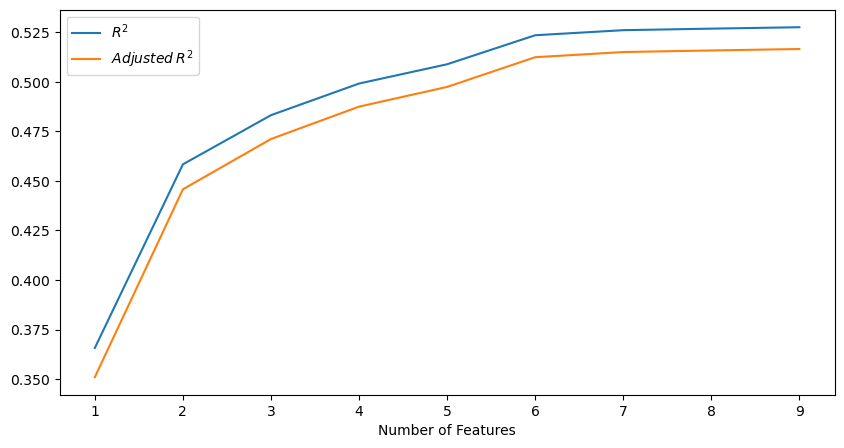

In [213]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



